<a href="https://colab.research.google.com/github/kj1103/cwiczenia1/blob/main/zatoki_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyreadr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.0/417.0 kB 6.3 MB/s eta 0:00:00


In [30]:
import pyreadr
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pandas openpyxl


np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)
sklearn.__version__

'1.5.2'

In [15]:
file_path = 'https://drive.google.com/file/d/194Xk0OrSDdsxsscZ3L41Ut2kBS_oIiWA/view?usp=drive_link'

In [17]:
from google.colab import files
uploaded = files.upload()

Saving zatoki.rds to zatoki.rds


In [31]:
from google.colab import files
uploaded = files.upload()

Saving baza_zatoki2.xlsx to baza_zatoki2.xlsx


In [20]:
import pyreadr
result = pyreadr.read_r('zatoki.rds')

In [36]:
file_path = 'baza_zatoki2.xlsx'
zatoki2 = pd.read_excel(file_path)
print(zatoki2.head())

      period  GripexHotZatoki_opak  ctv3_ibuprom_zatoki_bieganie  \
0 2018-08-27           3428.106056                           0.0   
1 2018-09-03           4109.966439                           0.0   
2 2018-09-10           8516.845233                           0.0   
3 2018-09-17          11257.517648                           0.0   
4 2018-09-24          14924.927766                           0.0   

   ctv3_ibuprom_zatoki_kajaki  ctv3_ibuprom_sprint_zatoki_sponsoring  \
0                         0.0                                    0.0   
1                         0.0                                    0.0   
2                         0.0                                    0.0   
3                         0.0                                    0.0   
4                         0.0                                    0.0   

   ctv3_ibuprom_zatoki_sponsoring2019  first_wave_PL  second_wave_PL  \
0                                 0.0            0.0             0.0   
1             

In [24]:
zatoki = result[None]

In [27]:
print(zatoki.head())

       period  PSL0_ZAT__brak_mag_proc_og  PSL0_ZAT__cena_sprzed_brutto  \
0  2018-08-27                    0.000366                       19.1462   
1  2018-09-03                    0.000234                       19.3217   
2  2018-09-10                    0.000314                       19.7059   
3  2018-09-17                    0.000249                       19.6419   
4  2018-09-24                    0.000249                       19.4656   

   PSL0_ZAT__cena_sprzed_brutto_jr  PSL0_ZAT__cena_zak_netto  \
0                         0.797394                   13.2405   
1                         0.779104                   13.2630   
2                         0.765964                   14.8107   
3                         0.786750                   14.9570   
4                         0.812837                   13.8827   

   PSL0_ZAT__dyst_mag_num  PSL0_ZAT__dyst_sprzed_num  PSL0_ZAT__dyst_zak_num  \
0                0.999634                   0.949330                0.816953   
1   

In [29]:
zatoki.info()
zatoki.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 12217 entries, period to kubek30
dtypes: float64(12116), int32(94), object(7)
memory usage: 17.8+ MB


,count,mean,std,min,25%,50%,75%,max
PSL0_ZAT__brak_mag_proc_og,192.0,0.000658,0.000708,0.000000,0.000249,0.000500,0.000850,0.005600
PSL0_ZAT__cena_sprzed_brutto,192.0,22.326266,1.897384,19.146200,20.766225,21.795000,23.492500,26.520000
PSL0_ZAT__cena_sprzed_brutto_jr,192.0,0.861380,0.055102,0.765964,0.819139,0.843729,0.896398,1.000264
PSL0_ZAT__cena_zak_netto,192.0,16.342971,1.746801,11.830000,14.987500,16.230000,17.812500,19.790000
PSL0_ZAT__dyst_mag_num,192.0,0.999342,0.000708,0.994400,0.999150,0.999500,0.999751,1.000000
...,...,...,...,...,...,...,...,...
pankatar15,192.0,88.578542,114.802333,0.000000,0.000000,0.000000,157.360000,488.690000
pankatar30_18_19,192.0,38.395625,77.169811,0.000000,0.000000,0.000000,4.335000,541.200000
pankatar30_20,192.0,8.777396,33.631656,0.000000,0.000000,0.000000,0.000000,227.830000
kubek15,192.0,17.602292,63.655103,0.000000,0.000000,0.000000,0.000000,489.430000


In [53]:
zatoki['period'] = pd.to_datetime(zatoki['period'], errors='coerce')
zatoki2['period'] = pd.to_datetime(zatoki2['period'], errors='coerce')


zatoki_total = pd.merge(zatoki, zatoki2, on='period', how='inner')
print(zatoki_total.head())
zatoki_total.describe()


      period  PSL0_ZAT__brak_mag_proc_og  PSL0_ZAT__cena_sprzed_brutto  \
0 2018-08-27                    0.000366                       19.1462   
1 2018-09-03                    0.000234                       19.3217   
2 2018-09-10                    0.000314                       19.7059   
3 2018-09-17                    0.000249                       19.6419   
4 2018-09-24                    0.000249                       19.4656   

   PSL0_ZAT__cena_sprzed_brutto_jr  PSL0_ZAT__cena_zak_netto  \
0                         0.797394                   13.2405   
1                         0.779104                   13.2630   
2                         0.765964                   14.8107   
3                         0.786750                   14.9570   
4                         0.812837                   13.8827   

   PSL0_ZAT__dyst_mag_num  PSL0_ZAT__dyst_sprzed_num  PSL0_ZAT__dyst_zak_num  \
0                0.999634                   0.949330                0.816953   
1         

,period,PSL0_ZAT__brak_mag_proc_og,PSL0_ZAT__cena_sprzed_brutto,PSL0_ZAT__cena_sprzed_brutto_jr,PSL0_ZAT__cena_zak_netto,PSL0_ZAT__dyst_mag_num,PSL0_ZAT__dyst_sprzed_num,PSL0_ZAT__dyst_zak_num,PSL0_ZAT__il_sprzed,PSL0_ZAT__il_sprzed_jr,...,d_26082019_y,d_04012021_y,d_08022021_y,d_02092019_y,d_1sty_y,d_1pbn_y,d_2pbn_y,d_3maj_y,d_bc_y,d_nwn_y
count,192,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,1.920000e+02,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,2020-06-25 12:00:00,0.000658,22.326266,0.861380,16.342971,0.999342,0.967913,0.844626,212225.357067,5.455728e+06,...,0.005208,0.005208,0.005208,0.005208,0.020833,0.036458,0.036458,0.015625,0.015625,0.020833
min,2018-08-27 00:00:00,0.000000,19.146200,0.765964,11.830000,0.994400,0.868900,0.498200,56691.000000,1.428697e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-07-27 06:00:00,0.000249,20.766225,0.819139,14.987500,0.999150,0.956725,0.815925,131733.672361,3.399763e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020-06-25 12:00:00,0.000500,21.795000,0.843729,16.230000,0.999500,0.978700,0.878177,216204.818946,5.670693e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021-05-25 18:00:00,0.000850,23.492500,0.896398,17.812500,0.999751,0.985975,0.916600,286838.152347,7.458719e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022-04-25 00:00:00,0.005600,26.520000,1.000264,19.790000,1.000000,0.993900,0.951300,483316.000000,1.218522e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.000708,1.897384,0.055102,1.746801,0.000708,0.026137,0.100999,87473.178998,2.247133e+06,...,0.072169,0.072169,0.072169,0.072169,0.143200,0.187918,0.187918,0.124344,0.124344,0.143200


In [42]:
target = zatoki_total.pop('GripexHotZatoki_opak')
target.head()

,GripexHotZatoki_opak
0,3428.106056
1,4109.966439
2,8516.845233
3,11257.517648
4,14924.927766


In [60]:
baza1 = zatoki_total.drop('period', axis=1)
print(baza1.head())

   PSL0_ZAT__brak_mag_proc_og  PSL0_ZAT__cena_sprzed_brutto  \
0                    0.000366                       19.1462   
1                    0.000234                       19.3217   
2                    0.000314                       19.7059   
3                    0.000249                       19.6419   
4                    0.000249                       19.4656   

   PSL0_ZAT__cena_sprzed_brutto_jr  PSL0_ZAT__cena_zak_netto  \
0                         0.797394                   13.2405   
1                         0.779104                   13.2630   
2                         0.765964                   14.8107   
3                         0.786750                   14.9570   
4                         0.812837                   13.8827   

   PSL0_ZAT__dyst_mag_num  PSL0_ZAT__dyst_sprzed_num  PSL0_ZAT__dyst_zak_num  \
0                0.999634                   0.949330                0.816953   
1                0.999766                   0.950302                0.800980

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(baza1, target, test_size=0.3)

print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_trian shape: (134, 12243)
X_test shape: (58, 12243)
y_trian shape: (134,)
y_test shape: (58,)


In [75]:
#print(X_train.head())
#X_train.info()
print(X_train.dtypes)
X_train = X_train.select_dtypes(exclude=['object'])  # Usuń kolumny typu object
X_test = X_test.select_dtypes(exclude=['object'])
print(X_train.isnull().sum())  # Sprawdź brakujące wartości w X_train
print(X_test.isnull().sum())   # Sprawdź brakujące wartości w X_test
X_train = X_train.dropna()
X_test = X_test.dropna()

PSL0_ZAT__brak_mag_proc_og         float64
PSL0_ZAT__cena_sprzed_brutto       float64
PSL0_ZAT__cena_sprzed_brutto_jr    float64
PSL0_ZAT__cena_zak_netto           float64
PSL0_ZAT__dyst_mag_num             float64
                                    ...   
d_1pbn_y                             int64
d_2pbn_y                             int64
d_3maj_y                             int64
d_bc_y                               int64
d_nwn_y                              int64
Length: 12237, dtype: object
PSL0_ZAT__brak_mag_proc_og         0
PSL0_ZAT__cena_sprzed_brutto       0
PSL0_ZAT__cena_sprzed_brutto_jr    0
PSL0_ZAT__cena_zak_netto           0
PSL0_ZAT__dyst_mag_num             0
                                  ..
d_1pbn_y                           0
d_2pbn_y                           0
d_3maj_y                           0
d_bc_y                             0
d_nwn_y                            0
Length: 12237, dtype: int64
PSL0_ZAT__brak_mag_proc_og         0
PSL0_ZAT__cena_sprzed_brut

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [78]:
print("Współczynniki regresji:", regressor.coef_)
print("Wyraz wolny:", regressor.intercept_)

Współczynniki regresji: [-0.  0.  0. ...  0.  0.  0.]
Wyraz wolny: -325.2746636228385


In [79]:
from sklearn.metrics import mean_squared_error, r2_score

# Predykcja
y_pred = regressor.predict(X_test)

# R^2
print(f"R^2: {r2_score(y_test, y_pred)}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

R^2: 0.960605530339054
MSE: 1122997.5110567098
MAE: 603.8238744697879


ValueError: x and y must be the same size

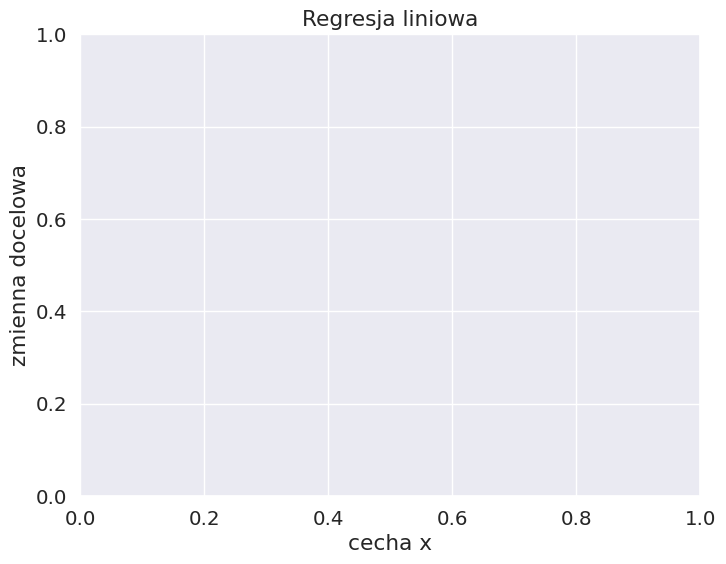

In [81]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(baza1, target, label='cecha x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.show()